In [1]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/UTRECHT/eval_utils')
sys.path.insert(0,'/content/gdrive/MyDrive/UTRECHT/eval_utils')

In [3]:
import os
import _init_paths
from utils import *
from Evaluator import *
from BoundingBox import BoundingBox
from BoundingBoxes import BoundingBoxes

In [16]:
eval_dir = '/content/gdrive/MyDrive/eval' 
project_name = '02_Exp1_SmallGrains'
trials = ['Trial_01', 'Trial_02', 'Trial_03','Trial_04' ]
trial = trials[3]
params = ['02_a_00_b','10_a_00_b','non_fused_10_a']
param = params[1]

eval_dir = os.path.join(eval_dir, project_name, trial) 

detections_dir = os.path.join(eval_dir, param, 'det')
if not os.path.exists(detections_dir):
  os.makedirs(detections_dir)
# gt_dir = os.path.join(eval_dir, 'gt','00_gen')      
gt_dir = '/content/gdrive/MyDrive/eval/01_Generalized_Model_FullTrainingData/Trial_03/gt' # DON'T change, ground-truth boxes remain the same for all.

save_path = os.path.join(eval_dir, param, 'results')
if not os.path.exists(save_path): 
    os.makedirs(save_path)

print(gt_dir)
print(detections_dir)
print(save_path)
# print(save_path)

/content/gdrive/MyDrive/eval/01_Generalized_Model_FullTrainingData/Trial_03/gt
/content/gdrive/MyDrive/eval/02_Exp1_SmallGrains/Trial_04/10_a_00_b/det
/content/gdrive/MyDrive/eval/02_Exp1_SmallGrains/Trial_04/10_a_00_b/results




####################################################################################################
#                                                                                                  #
# THE CURRENT VERSION WAS UPDATED WITH A VISUAL INTERFACE, INCLUDING MORE METRICS AND SUPPORTING   #
# OTHER FILE FORMATS.                                                                              #
#                                                                                                  #
# PLEASE ACCESS IT ACCESSED AT:                                                                    #
# https://github.com/rafaelpadilla/review_object_detection_metrics                                 #
#                                                                                                  #
# @Article{electronics10030279,                                                                    #
#     author         = {Padilla, Rafael and Passos, Wesley L. and Dias, Thadeu L. B. and 

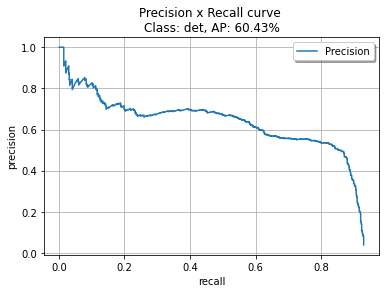

AP: 60.43% (det)
mAP: 60.43%


In [15]:
%run /content/gdrive/MyDrive/UTRECHT/eval_utils/pascalvoc.py -gt /content/gdrive/MyDrive/eval/01_Generalized_Model_FullTrainingData/Trial_03/gt -det /content/gdrive/MyDrive/eval/02_Exp1_SmallGrains/Trial_04/10_a_00_b/det -t 0.3 -detformat xyrb -gtformat xyrb -sp /content/gdrive/MyDrive/eval/02_Exp1_SmallGrains/Trial_04/10_a_00_b/results2

In [17]:
# gen_detections_dir = os.path.join(eval_dir, '00_gen_eval_scratch')
gen_detections_dir = '/content/gdrive/MyDrive/eval/01_Generalized_Model_FullTrainingData/Trial_03/results'
gen_det_filename = os.path.join(gen_detections_dir, 'results.txt')

detections_dir = save_path
det_filename = os.path.join(detections_dir, 'results.txt')

with open(gen_det_filename) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    mAP_gen = lines[7]
    for i in [8,9]:
        tmp_line = lines[i].split(': ')
        if i == 8:
          precision_list_orig = tmp_line[1]
        if i == 9:
          recall_list_orig = tmp_line[1]

with open(det_filename) as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    mAP_calibrated = lines[13]
    for i in [8,9]:
        tmp_line = lines[i].split(': ')
        if i == 8:
          precision_list_calibrated = tmp_line[1]
        if i == 9:
          recall_list_calibrated = tmp_line[1]

print(mAP_gen)
print('precision_list_orig: ', precision_list_orig)
print('recall_list_orig: ', recall_list_orig)
print(mAP_calibrated)
print('precision_list_calibrated:', precision_list_calibrated)
print('recall_list_calibrated:', recall_list_calibrated)

AP: 73.21%
precision_list_orig:  ['1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.88', '0.89', '0.90', '0.91', '0.92', '0.92', '0.93', '0.93', '0.94', '0.94', '0.94', '0.95', '0.95', '0.90', '0.91', '0.91', '0.88', '0.88', '0.88', '0.85', '0.86', '0.86', '0.87', '0.84', '0.84', '0.82', '0.82', '0.80', '0.78', '0.78', '0.79', '0.79', '0.80', '0.80', '0.81', '0.81', '0.82', '0.82', '0.83', '0.83', '0.83', '0.84', '0.84', '0.84', '0.85', '0.85', '0.85', '0.85', '0.86', '0.86', '0.86', '0.86', '0.87', '0.87', '0.85', '0.86', '0.86', '0.86', '0.86', '0.85', '0.85', '0.86', '0.86', '0.86', '0.85', '0.85', '0.84', '0.84', '0.84', '0.84', '0.85', '0.84', '0.84', '0.84', '0.84', '0.84', '0.85', '0.85', '0.85', '0.85', '0.85', '0.85', '0.86', '0.86', '0.86', '0.86', '0.86', '0.86', '0.86', '0.87', '0.87', '0.87', '0.86', '0.86', '0.86', '0.86', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.87', '0.88', '0.88', '0.88', '0.88', '0.88', '0.88', '0.88', '0.87', '0.88', '0.88'

In [18]:
# lists = [precision_list_orig, recall_list_orig, precision_list_calibrated, recall_list_calibrated]
list_dict = {'precision_list_orig': precision_list_orig, 
             'recall_list_orig': recall_list_orig,
             'precision_list_calibrated': precision_list_calibrated,
             'recall_list_calibrated': recall_list_calibrated}
for key in list_dict:
  value = list_dict[key]
  value = str.split(value, ",")
  tmp_list = []
  for i in value:
      i = str.split(i, "'")
      i = float(i[1])
      tmp_list.append(i)
  value = tmp_list
  list_dict.update({key:value})
  print(value)

precision_list_orig = list_dict['precision_list_orig']
recall_list_orig = list_dict['recall_list_orig']
precision_list_calibrated = list_dict['precision_list_calibrated']
recall_list_calibrated = list_dict['recall_list_calibrated']

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.88, 0.89, 0.9, 0.91, 0.92, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.9, 0.91, 0.91, 0.88, 0.88, 0.88, 0.85, 0.86, 0.86, 0.87, 0.84, 0.84, 0.82, 0.82, 0.8, 0.78, 0.78, 0.79, 0.79, 0.8, 0.8, 0.81, 0.81, 0.82, 0.82, 0.83, 0.83, 0.83, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.86, 0.86, 0.86, 0.87, 0.87, 0.85, 0.86, 0.86, 0.86, 0.86, 0.85, 0.85, 0.86, 0.86, 0.86, 0.85, 0.85, 0.84, 0.84, 0.84, 0.84, 0.85, 0.84, 0.84, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.86, 0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.88, 0.88, 0.88, 0.88, 0.89, 0.89, 0.89, 0.8

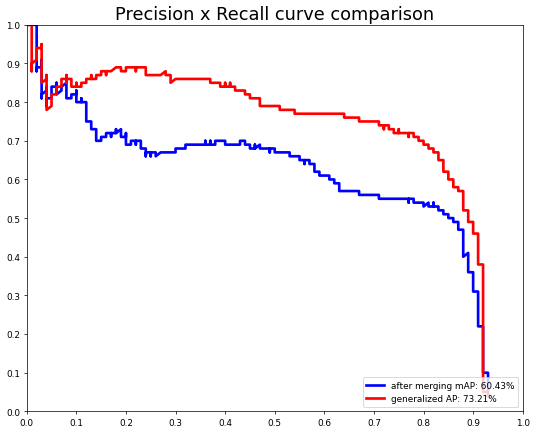

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8), dpi=64, facecolor='w', edgecolor='k')

plt.xlim([0, 1])
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.ylim([0, 1])
plt.yticks(np.arange(0, 1.1, step=0.1))


plt.plot(recall_list_calibrated, precision_list_calibrated, color='blue', linewidth=3, label='after merging ' + mAP_calibrated)
plt.plot(recall_list_orig, precision_list_orig, color='red', linewidth=3, label='generalized ' + mAP_gen)
plt.title(label = 'Precision x Recall curve comparison', fontsize=20, loc='center')
plt.legend(loc="lower right")